In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
id = 100
nasa_power_file = '/home/rodrigo7/Apsim_test/MASAGRO/PCSE/CH{0:05d}_np.csv'.format(id)
nasa_power_df = pd.read_csv(nasa_power_file, skiprows=13)
nasa_power_df.DAY = pd.to_datetime(nasa_power_df.DAY, format= '%Y%m%d').dt.date

In [134]:
daymet_file = '/home/rodrigo7/Apsim_test/MASAGRO/PCSE/CH{0:05d}_dm.csv'.format(id)
daymet_df = pd.read_csv(daymet_file, skiprows=13)
daymet_df.DAY = pd.to_datetime(daymet_df.DAY, format= '%Y%m%d').dt.date

In [135]:
daymet_df

,DAY,IRRAD,TMIN,TMAX,VAP,WIND,RAIN,SNOWDEPTH
0,1980-01-01,12337,15.0,27.5,1.72,NaN,0,NaN
1,1980-01-02,13736,15.5,30.0,1.76,NaN,0,NaN
2,1980-01-03,17042,13.5,33.0,1.72,NaN,0,NaN
3,1980-01-04,10904,15.5,26.0,1.72,NaN,0,NaN
4,1980-01-05,14368,15.0,29.5,1.40,NaN,0,NaN
...,...,...,...,...,...,...,...,...
14240,2018-12-27,15643,17.0,31.0,1.92,NaN,0,NaN
14241,2018-12-28,15262,17.0,30.5,1.92,NaN,0,NaN
14242,2018-12-29,15135,18.0,31.5,2.08,NaN,0,NaN
14243,2018-12-30,14753,18.0,31.0,2.08,NaN,0,NaN


In [83]:
pvars = ['IRRAD', 'TMIN', 'TMAX', 'VAP', 'RAIN']
daymet_dfm = daymet_df.melt(id_vars='DAY', value_vars = pvars)
nasa_power_dfm = nasa_power_df.melt(id_vars='DAY', value_vars = pvars)
dfm = pd.merge(daymet_dfm, nasa_power_dfm, on = ['DAY', 'variable'], suffixes=('_dm', '_np'))


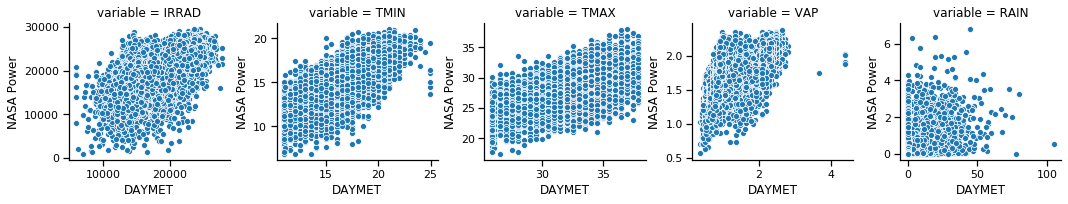

In [99]:
sns.set_context("notebook", font_scale=1)
g = sns.FacetGrid(dfm, col="variable", sharex=False, sharey=False) 
g.map(sns.scatterplot, "value_dm", "value_np", )

g.set(xlabel='DAYMET', ylabel='NASA Power')
plt.show()



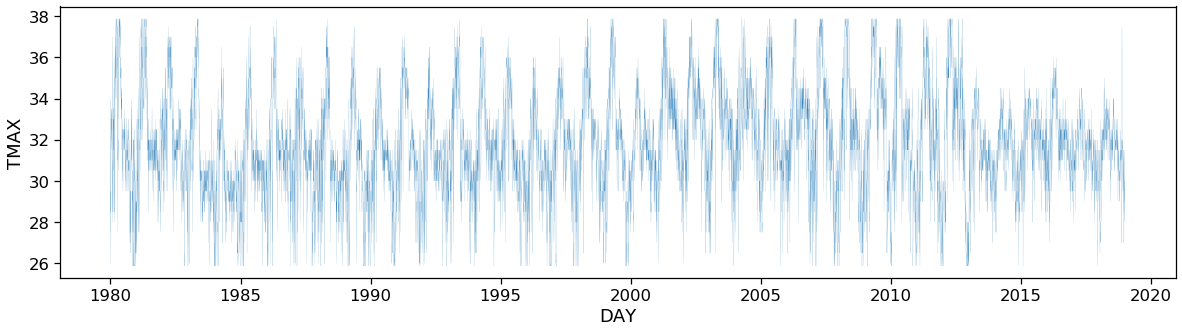

In [136]:
plt.figure(figsize=(20,5))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 0.1})
sns.lineplot('DAY', 'TMAX', data = daymet_df)


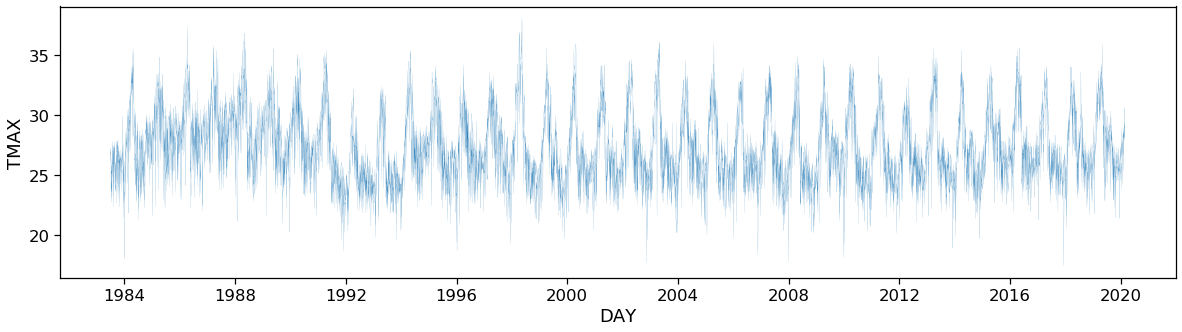

In [137]:
plt.figure(figsize=(20,5))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 0.1})
sns.lineplot('DAY', 'TMAX', data = nasa_power_df)


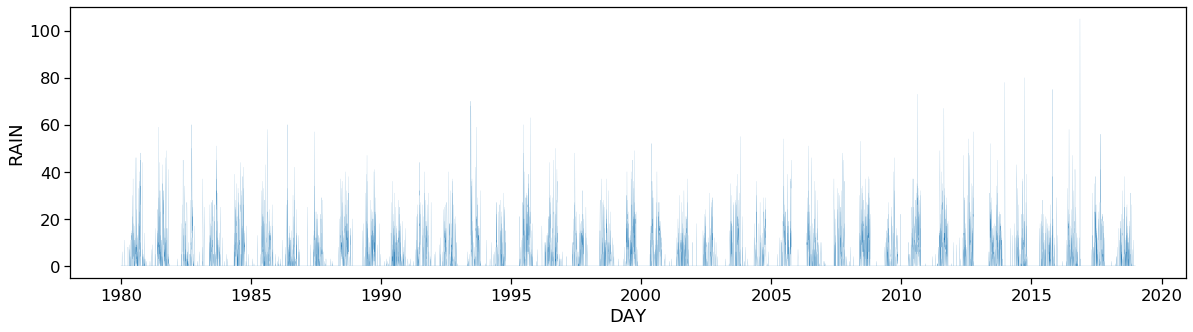

In [131]:
plt.figure(figsize=(20,5))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 0.1})
sns.lineplot('DAY', 'RAIN', data = daymet_df)
